## With Data Generator

In [1]:
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
cifar10 = tf.keras.datasets.cifar10

In [4]:
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

X_train.shape, y_train.shape, X_test.shape, y_test.shape

((50000, 32, 32, 3), (50000, 1), (10000, 32, 32, 3), (10000, 1))

In [5]:
y_train[:5]

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

In [6]:
y_train_flat = [item for sublist in y_train for item in sublist]

In [7]:
import collections

collections.Counter(list(y_train_flat))

Counter({0: 5000,
         1: 5000,
         2: 5000,
         3: 5000,
         4: 5000,
         5: 5000,
         6: 5000,
         7: 5000,
         8: 5000,
         9: 5000})

In [8]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

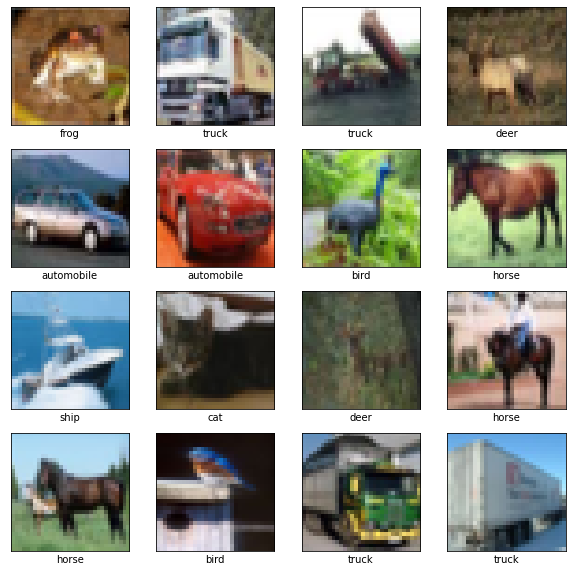

In [9]:
plt.figure(figsize=(10,10))

for i in range(16):
    plt.subplot(4,4,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X_train[i], cmap=plt.cm.binary)
    # The CIFAR labels happen to be arrays, 
    # which is why you need the extra index
    plt.xlabel(class_names[y_train[i][0]])
    
plt.show()

In [10]:
IMG_HEIGHT = 32
IMG_WIDTH = 32
CHANNELS = 3
BATCH_SIZE = 64

In [11]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
                            rescale=1./255.,
                            rotation_range=40,
                            width_shift_range=0.2,
                            height_shift_range=0.2,
                            shear_range=0.2,
                            zoom_range=0.2,
                            horizontal_flip=True,
                            vertical_flip=False,
                            fill_mode='nearest'
)

train_generator = train_datagen.flow(X_train,
                                     y_train,
                                     seed=20,
                                     batch_size=BATCH_SIZE)

In [12]:
test_datagen = ImageDataGenerator(
                            rescale=1./255.
)

test_generator = test_datagen.flow(X_test,
                                   y_test,
                                   seed=20,
                                   batch_size=BATCH_SIZE)

In [13]:
len(class_names)

10

In [14]:
NUM_CLASSES = len(class_names)

In [15]:
model = Sequential([
    layers.InputLayer(input_shape=(IMG_HEIGHT, IMG_WIDTH, CHANNELS)),
    layers.Conv2D(32, (3,3), activation='relu'),
    layers.MaxPool2D(2, 2),
    layers.Dropout(0.5),
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPool2D(2,2),
    layers.Dropout(0.5),
    layers.Flatten(),
    layers.Dropout(0.5),
    layers.Dense(64, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(NUM_CLASSES, activation='softmax')
])

In [16]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 30, 30, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 15, 15, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 13, 13, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 6, 6, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 2304)              0

In [17]:
optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)
loss      = tf.keras.losses.SparseCategoricalCrossentropy()
metrics   = ['accuracy']

In [18]:
model.compile(optimizer=optimizer,
              loss=loss,
              metrics=metrics)

In [19]:
early_stopping    = EarlyStopping(monitor='val_loss', patience=5)
model_checkpoint  = ModelCheckpoint(monitor='val_loss', filepath='./best_model.h5', save_best_only=True)

In [20]:
EPOCHS = 20
CALLBACKS = [early_stopping, model_checkpoint]

In [21]:
history = model.fit(train_generator,
                    validation_data=test_generator,
                    epochs=EPOCHS,
                    callbacks = CALLBACKS,
                    verbose=1
                    )

# if test_generator not present, then we can pass like validation_data=(X_test, y_test)

Epoch 1/20
782/782 [==============================] - 43s 47ms/step - loss: 2.0455 - accuracy: 0.1280 - val_loss: 1.7510 - val_accuracy: 0.0282
Epoch 2/20
782/782 [==============================] - 36s 46ms/step - loss: 1.8674 - accuracy: 0.0886 - val_loss: 1.6359 - val_accuracy: 0.0536
Epoch 3/20
782/782 [==============================] - 35s 45ms/step - loss: 1.8141 - accuracy: 0.0859 - val_loss: 1.6385 - val_accuracy: 0.0575
Epoch 4/20
782/782 [==============================] - 36s 46ms/step - loss: 1.7799 - accuracy: 0.0847 - val_loss: 1.5590 - val_accuracy: 0.0386
Epoch 5/20
782/782 [==============================] - 36s 46ms/step - loss: 1.7506 - accuracy: 0.0851 - val_loss: 1.5944 - val_accuracy: 0.0733
Epoch 6/20
782/782 [==============================] - 36s 46ms/step - loss: 1.7295 - accuracy: 0.0835 - val_loss: 1.4635 - val_accuracy: 0.0647
Epoch 7/20
782/782 [==============================] - 37s 47ms/step - loss: 1.7304 - accuracy: 0.0862 - val_loss: 1.5069 - val_accuracy:

<Figure size 432x288 with 0 Axes>

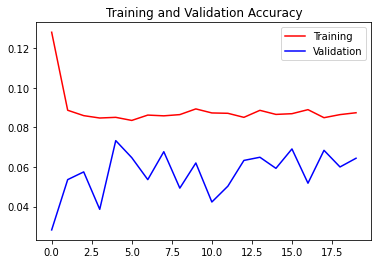

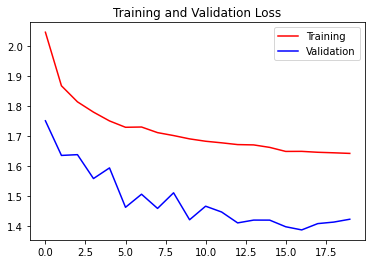

<Figure size 432x288 with 0 Axes>

In [22]:
acc      = history.history['accuracy']
val_acc  = history.history['val_accuracy']

epochs   = range(len(acc))

plt.plot(epochs, acc, 'r', label = 'Training')
plt.plot(epochs, val_acc, 'b', label = 'Validation')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.figure()

loss     = history.history['loss']
val_loss = history.history['val_loss']

epochs   = range(len(loss))

plt.plot(epochs, loss, 'r', label = 'Training')
plt.plot(epochs, val_loss, 'b', label = 'Validation')
plt.title('Training and Validation Loss')
plt.legend()
plt.figure()

In [23]:
model.evaluate(X_test, y_test, batch_size=BATCH_SIZE, verbose=1)

157/157 [==============================] - 1s 4ms/step - loss: 157.0125 - accuracy: 0.8445


[157.01254272460938, 0.8445000052452087]

## With Data Generator (only Scaling)

In [ ]:
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

X_train.shape, y_train.shape, X_test.shape, y_test.shape

((50000, 32, 32, 3), (50000, 1), (10000, 32, 32, 3), (10000, 1))

In [ ]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

In [ ]:
IMG_HEIGHT = 32
IMG_WIDTH = 32
CHANNELS = 3
BATCH_SIZE = 64

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
                            rescale=1./255.
)

train_generator = train_datagen.flow(X_train,
                                     y_train,
                                     seed=20,
                                     batch_size=BATCH_SIZE)

In [ ]:
test_datagen = ImageDataGenerator(
                            rescale=1./255.
)

test_generator = test_datagen.flow(X_test,
                                   y_test,
                                   seed=20,
                                   batch_size=BATCH_SIZE)

In [ ]:
NUM_CLASSES = len(class_names)

In [ ]:
model = Sequential([
    layers.InputLayer(input_shape=(IMG_HEIGHT, IMG_WIDTH, CHANNELS)),
    layers.Conv2D(32, (3,3), activation='relu'),
    layers.MaxPool2D(2, 2),
    layers.Dropout(0.5),
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPool2D(2,2),
    layers.Dropout(0.5),
    layers.Flatten(),
    layers.Dropout(0.5),
    layers.Dense(64, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(NUM_CLASSES, activation='softmax')
])

In [ ]:
optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)
loss      = tf.keras.losses.SparseCategoricalCrossentropy()
metrics   = ['accuracy']

In [ ]:
model.compile(optimizer=optimizer,
              loss=loss,
              metrics=metrics)

In [ ]:
early_stopping    = EarlyStopping(monitor='val_loss', patience=7)
model_checkpoint  = ModelCheckpoint(monitor='val_loss', filepath='./best_model.h5', save_best_only=True)

In [ ]:
EPOCHS = 50
CALLBACKS = [early_stopping, model_checkpoint]

In [ ]:
history = model.fit(train_generator,
                    validation_data=test_generator,
                    epochs=EPOCHS,
                    callbacks = CALLBACKS,
                    verbose=1
                    )

Epoch 1/50
782/782 [==============================] - 8s 10ms/step - loss: 1.9423 - accuracy: 0.1258 - val_loss: 1.5853 - val_accuracy: 0.0974
Epoch 2/50
782/782 [==============================] - 7s 9ms/step - loss: 1.6417 - accuracy: 0.0937 - val_loss: 1.4954 - val_accuracy: 0.0550
Epoch 3/50
782/782 [==============================] - 7s 9ms/step - loss: 1.5615 - accuracy: 0.0855 - val_loss: 1.3832 - val_accuracy: 0.0618
Epoch 4/50
782/782 [==============================] - 7s 9ms/step - loss: 1.5192 - accuracy: 0.0856 - val_loss: 1.3556 - val_accuracy: 0.0794
Epoch 5/50
782/782 [==============================] - 7s 10ms/step - loss: 1.4818 - accuracy: 0.0864 - val_loss: 1.3621 - val_accuracy: 0.0610
Epoch 6/50
782/782 [==============================] - 7s 9ms/step - loss: 1.4570 - accuracy: 0.0853 - val_loss: 1.3252 - val_accuracy: 0.0849
Epoch 7/50
782/782 [==============================] - 7s 10ms/step - loss: 1.4438 - accuracy: 0.0874 - val_loss: 1.2716 - val_accuracy: 0.0715
Epo

<Figure size 432x288 with 0 Axes>

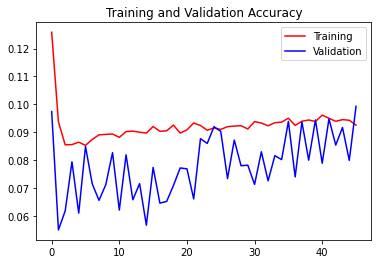

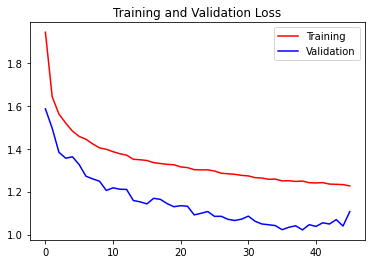

<Figure size 432x288 with 0 Axes>

In [ ]:
acc      = history.history['accuracy']
val_acc  = history.history['val_accuracy']

epochs   = range(len(acc))

plt.plot(epochs, acc, 'r', label = 'Training')
plt.plot(epochs, val_acc, 'b', label = 'Validation')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.figure()

loss     = history.history['loss']
val_loss = history.history['val_loss']

epochs   = range(len(loss))

plt.plot(epochs, loss, 'r', label = 'Training')
plt.plot(epochs, val_loss, 'b', label = 'Validation')
plt.title('Training and Validation Loss')
plt.legend()
plt.figure()

In [ ]:
model.evaluate(X_test, y_test, batch_size=BATCH_SIZE, verbose=1)

157/157 [==============================] - 1s 4ms/step - loss: 137.5174 - accuracy: 0.4608


[137.51739501953125, 0.4607999920845032]

## No Data Generator (Scaled Manually)

In [ ]:
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

X_train.shape, y_train.shape, X_test.shape, y_test.shape

((50000, 32, 32, 3), (50000, 1), (10000, 32, 32, 3), (10000, 1))

In [ ]:
X_train, X_test = X_train/255.0, X_test/255.0

In [ ]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

In [ ]:
IMG_HEIGHT = 32
IMG_WIDTH = 32
CHANNELS = 3
BATCH_SIZE = 64

In [ ]:
NUM_CLASSES = len(class_names)

In [ ]:
model = Sequential([
    layers.InputLayer(input_shape=(IMG_HEIGHT, IMG_WIDTH, CHANNELS)),
    layers.Conv2D(32, (3,3), activation='relu'),
    layers.MaxPool2D(2, 2),
    layers.Dropout(0.5),
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPool2D(2,2),
    layers.Dropout(0.5),
    layers.Flatten(),
    layers.Dropout(0.5),
    layers.Dense(64, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(NUM_CLASSES, activation='softmax')
])

In [ ]:
optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)
loss      = tf.keras.losses.SparseCategoricalCrossentropy()
metrics   = ['accuracy']

In [ ]:
model.compile(optimizer=optimizer,
              loss=loss,
              metrics=metrics)

In [ ]:
early_stopping    = EarlyStopping(monitor='val_loss', patience=20)
model_checkpoint  = ModelCheckpoint(monitor='val_loss', filepath='./best_model.h5', save_best_only=True)

In [ ]:
EPOCHS = 100
CALLBACKS = [early_stopping, model_checkpoint]

In [ ]:
history = model.fit(X_train,
                    y_train,
                    validation_data = (X_test, y_test),
                    epochs = EPOCHS,
                    callbacks = CALLBACKS,
                    batch_size = BATCH_SIZE,
                    verbose=1
                    )

Epoch 1/100
782/782 [==============================] - 8s 9ms/step - loss: 1.9294 - accuracy: 0.2742 - val_loss: 1.6001 - val_accuracy: 0.4378
Epoch 2/100
782/782 [==============================] - 7s 9ms/step - loss: 1.6503 - accuracy: 0.3972 - val_loss: 1.4762 - val_accuracy: 0.4899
Epoch 3/100
782/782 [==============================] - 7s 8ms/step - loss: 1.5664 - accuracy: 0.4293 - val_loss: 1.4022 - val_accuracy: 0.5247
Epoch 4/100
782/782 [==============================] - 7s 9ms/step - loss: 1.5148 - accuracy: 0.4501 - val_loss: 1.3434 - val_accuracy: 0.5363
Epoch 5/100
782/782 [==============================] - 7s 8ms/step - loss: 1.4825 - accuracy: 0.4634 - val_loss: 1.3514 - val_accuracy: 0.5318
Epoch 6/100
782/782 [==============================] - 6s 8ms/step - loss: 1.4535 - accuracy: 0.4756 - val_loss: 1.3100 - val_accuracy: 0.5520
Epoch 7/100
782/782 [==============================] - 7s 9ms/step - loss: 1.4342 - accuracy: 0.4848 - val_loss: 1.2621 - val_accuracy: 0.5819

<Figure size 432x288 with 0 Axes>

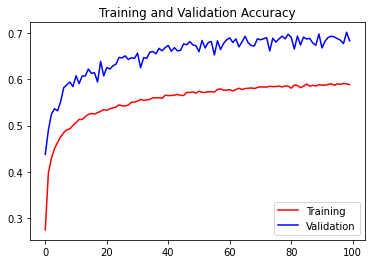

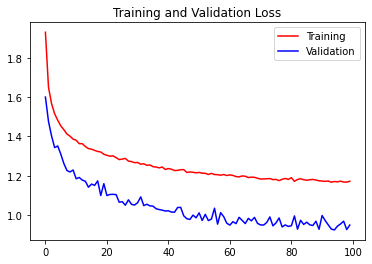

<Figure size 432x288 with 0 Axes>

In [ ]:
acc      = history.history['accuracy']
val_acc  = history.history['val_accuracy']

epochs   = range(len(acc))

plt.plot(epochs, acc, 'r', label = 'Training')
plt.plot(epochs, val_acc, 'b', label = 'Validation')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.figure()

loss     = history.history['loss']
val_loss = history.history['val_loss']

epochs   = range(len(loss))

plt.plot(epochs, loss, 'r', label = 'Training')
plt.plot(epochs, val_loss, 'b', label = 'Validation')
plt.title('Training and Validation Loss')
plt.legend()
plt.figure()

In [ ]:
model.evaluate(X_test, y_test, batch_size=BATCH_SIZE, verbose=1)

157/157 [==============================] - 1s 4ms/step - loss: 0.9496 - accuracy: 0.6832


[0.9496464729309082, 0.6832000017166138]

## Using LR Optimizer

In [ ]:
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

X_train.shape, y_train.shape, X_test.shape, y_test.shape

((50000, 32, 32, 3), (50000, 1), (10000, 32, 32, 3), (10000, 1))

In [ ]:
X_train, X_test = X_train/255.0, X_test/255.0

In [ ]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

In [ ]:
IMG_HEIGHT = 32
IMG_WIDTH = 32
CHANNELS = 3
BATCH_SIZE = 64

In [ ]:
NUM_CLASSES = len(class_names)

In [ ]:
model = Sequential([
    layers.InputLayer(input_shape=(IMG_HEIGHT, IMG_WIDTH, CHANNELS)),
    layers.Conv2D(32, (3,3), activation='relu'),
    layers.MaxPool2D(2, 2),
    layers.Dropout(0.5),
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPool2D(2,2),
    layers.Dropout(0.5),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(NUM_CLASSES, activation='softmax')
])

In [ ]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_12 (Conv2D)           (None, 30, 30, 32)        896       
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 15, 15, 32)        0         
_________________________________________________________________
dropout_24 (Dropout)         (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 13, 13, 64)        18496     
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 6, 6, 64)          0         
_________________________________________________________________
dropout_25 (Dropout)         (None, 6, 6, 64)          0         
_________________________________________________________________
flatten_6 (Flatten)          (None, 2304)             

In [ ]:
EPOCHS = 70
CALLBACKS = [early_stopping, model_checkpoint]

In [ ]:
DECAY_STEPS = EPOCHS * len(X_train) // BATCH_SIZE

In [ ]:
DECAY_STEPS

54687

In [ ]:
# decay every 54687 steps with a base of 0.1

LEARNING_RATE = tf.keras.optimizers.schedules.ExponentialDecay(initial_learning_rate=0.002, decay_steps=DECAY_STEPS, decay_rate=0.1)

In [ ]:
optimizer = tf.keras.optimizers.Adam(learning_rate=LEARNING_RATE)
loss      = tf.keras.losses.SparseCategoricalCrossentropy()
metrics   = ['accuracy']

In [ ]:
model.compile(optimizer=optimizer,
              loss=loss,
              metrics=metrics)

In [ ]:
early_stopping    = EarlyStopping(monitor='val_loss', patience=20)
model_checkpoint  = ModelCheckpoint(monitor='val_loss', filepath='./best_model.h5', save_best_only=True)

In [ ]:
history = model.fit(X_train,
                    y_train,
                    validation_data = (X_test, y_test),
                    epochs = EPOCHS,
                    callbacks = CALLBACKS,
                    batch_size = BATCH_SIZE,
                    verbose=1
                    )

Epoch 1/70
782/782 [==============================] - 7s 9ms/step - loss: 1.8332 - accuracy: 0.3160 - val_loss: 1.5918 - val_accuracy: 0.4591
Epoch 2/70
782/782 [==============================] - 6s 8ms/step - loss: 1.6331 - accuracy: 0.3991 - val_loss: 1.4557 - val_accuracy: 0.5021
Epoch 3/70
782/782 [==============================] - 7s 9ms/step - loss: 1.5674 - accuracy: 0.4269 - val_loss: 1.4150 - val_accuracy: 0.5009
Epoch 4/70
782/782 [==============================] - 7s 8ms/step - loss: 1.5348 - accuracy: 0.4415 - val_loss: 1.3960 - val_accuracy: 0.5298
Epoch 5/70
782/782 [==============================] - 7s 8ms/step - loss: 1.5036 - accuracy: 0.4554 - val_loss: 1.3267 - val_accuracy: 0.5466
Epoch 6/70
782/782 [==============================] - 6s 8ms/step - loss: 1.4790 - accuracy: 0.4622 - val_loss: 1.3562 - val_accuracy: 0.5532
Epoch 7/70
782/782 [==============================] - 6s 8ms/step - loss: 1.4610 - accuracy: 0.4728 - val_loss: 1.2823 - val_accuracy: 0.5708
Epoch 

<Figure size 432x288 with 0 Axes>

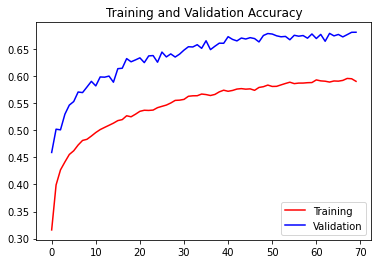

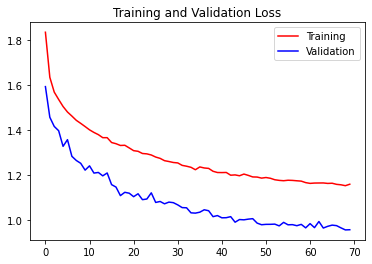

<Figure size 432x288 with 0 Axes>

In [ ]:
acc      = history.history['accuracy']
val_acc  = history.history['val_accuracy']

epochs   = range(len(acc))

plt.plot(epochs, acc, 'r', label = 'Training')
plt.plot(epochs, val_acc, 'b', label = 'Validation')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.figure()

loss     = history.history['loss']
val_loss = history.history['val_loss']

epochs   = range(len(loss))

plt.plot(epochs, loss, 'r', label = 'Training')
plt.plot(epochs, val_loss, 'b', label = 'Validation')
plt.title('Training and Validation Loss')
plt.legend()
plt.figure()

In [ ]:
model.evaluate(X_test, y_test, batch_size=BATCH_SIZE, verbose=1)

157/157 [==============================] - 1s 4ms/step - loss: 0.9564 - accuracy: 0.6812


[0.9564034938812256, 0.6812000274658203]

## Transfer Learning - Efficient Net

In [ ]:
import tensorflow_hub as hub

model_url = "https://tfhub.dev/tensorflow/efficientnet/b0/feature-vector/1"

In [ ]:
# save pretrained model as a Keras layer

feature_extractor_layer = hub.KerasLayer(model_url,
                                        trainable=False,                                      # freeze the underlying patterns
                                        name='feature_extraction_layer')

In [ ]:
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

X_train.shape, y_train.shape, X_test.shape, y_test.shape

((50000, 32, 32, 3), (50000, 1), (10000, 32, 32, 3), (10000, 1))

In [ ]:
X_train, X_test = X_train/255.0, X_test/255.0

In [ ]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

In [ ]:
IMG_HEIGHT = 32
IMG_WIDTH = 32
CHANNELS = 3
BATCH_SIZE = 64

In [ ]:
NUM_CLASSES = len(class_names)

In [ ]:
model = Sequential([
    layers.InputLayer(input_shape=(IMG_HEIGHT, IMG_WIDTH, CHANNELS)),
    feature_extractor_layer,
    layers.Dense(NUM_CLASSES, activation='softmax', name='output_layer')
])

In [ ]:
model.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
feature_extraction_layer (Ke (None, 1280)              4049564   
_________________________________________________________________
output_layer (Dense)         (None, 10)                12810     
Total params: 4,062,374
Trainable params: 12,810
Non-trainable params: 4,049,564
_________________________________________________________________


In [ ]:
optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)
loss      = tf.keras.losses.SparseCategoricalCrossentropy()
metrics   = ['accuracy']

In [ ]:
model.compile(optimizer=optimizer,
              loss=loss,
              metrics=metrics)

In [ ]:
early_stopping    = EarlyStopping(monitor='val_loss', patience=5)
model_checkpoint  = ModelCheckpoint(monitor='val_loss', filepath='./best_model.h5', save_best_only=True)

In [ ]:
EPOCHS = 50
CALLBACKS = [early_stopping, model_checkpoint]

In [ ]:
history = model.fit(X_train,
                    y_train,
                    validation_data = (X_test, y_test),
                    epochs = EPOCHS,
                    callbacks = CALLBACKS,
                    batch_size = BATCH_SIZE,
                    verbose=1
                    )

Epoch 1/50
782/782 [==============================] - 26s 29ms/step - loss: 1.5512 - accuracy: 0.4623 - val_loss: 1.3728 - val_accuracy: 0.5230
Epoch 2/50
782/782 [==============================] - 22s 28ms/step - loss: 1.3161 - accuracy: 0.5391 - val_loss: 1.2852 - val_accuracy: 0.5499
Epoch 3/50
782/782 [==============================] - 22s 28ms/step - loss: 1.2522 - accuracy: 0.5619 - val_loss: 1.2433 - val_accuracy: 0.5647
Epoch 4/50
782/782 [==============================] - 22s 28ms/step - loss: 1.2178 - accuracy: 0.5725 - val_loss: 1.2233 - val_accuracy: 0.5710
Epoch 5/50
782/782 [==============================] - 22s 28ms/step - loss: 1.1896 - accuracy: 0.5826 - val_loss: 1.2045 - val_accuracy: 0.5796
Epoch 6/50
782/782 [==============================] - 22s 28ms/step - loss: 1.1708 - accuracy: 0.5891 - val_loss: 1.1867 - val_accuracy: 0.5839
Epoch 7/50
782/782 [==============================] - 22s 28ms/step - loss: 1.1562 - accuracy: 0.5922 - val_loss: 1.1831 - val_accuracy:

<Figure size 432x288 with 0 Axes>

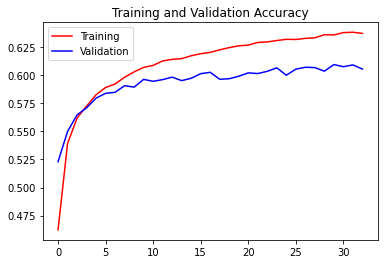

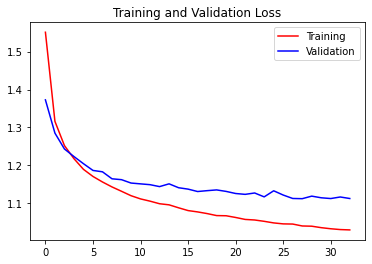

<Figure size 432x288 with 0 Axes>

In [ ]:
acc      = history.history['accuracy']
val_acc  = history.history['val_accuracy']

epochs   = range(len(acc))

plt.plot(epochs, acc, 'r', label = 'Training')
plt.plot(epochs, val_acc, 'b', label = 'Validation')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.figure()

loss     = history.history['loss']
val_loss = history.history['val_loss']

epochs   = range(len(loss))

plt.plot(epochs, loss, 'r', label = 'Training')
plt.plot(epochs, val_loss, 'b', label = 'Validation')
plt.title('Training and Validation Loss')
plt.legend()
plt.figure()

In [ ]:
model.evaluate(X_test, y_test, batch_size=BATCH_SIZE, verbose=1)

157/157 [==============================] - 4s 25ms/step - loss: 1.1127 - accuracy: 0.6055


[1.1126537322998047, 0.6054999828338623]

## VGG

In [24]:
vgg_model = tf.keras.applications.vgg16.VGG16()
type(vgg_model)

553476096/553467096 [==============================] - 6s 0us/step


keras.engine.functional.Functional

In [26]:
vgg_model.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [25]:
model = tf.keras.models.Sequential()             # making the above functional model as sequential

for layer in vgg_model.layers[:-1]:           # removing last layer from VGG
    model.add(layer)

In [27]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
_________________________________________________________________
block3_conv1 (Conv2D)        (None, 56, 56, 256)      

In [28]:
type(model)

keras.engine.sequential.Sequential

In [29]:
# no need to retrain again, so making trainable as False

for layer in model.layers:
    layer.trainable = False

In [30]:
model.add(layers.Dense(NUM_CLASSES, activation='softmax'))

In [31]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
_________________________________________________________________
block3_conv1 (Conv2D)        (None, 56, 56, 256)      

In [32]:
optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)
loss      = tf.keras.losses.SparseCategoricalCrossentropy()
metrics   = ['accuracy']

In [33]:
model.compile(optimizer=optimizer,
              loss=loss,
              metrics=metrics)

In [34]:
preprocess_input = tf.keras.applications.vgg16.preprocess_input

In [35]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(preprocessing_function=preprocess_input)

train_generator = train_datagen.flow(X_train,
                                     y_train,
                                     seed=20,
                                     batch_size=BATCH_SIZE)

In [36]:
test_datagen = ImageDataGenerator(preprocessing_function=preprocess_input)

test_generator = test_datagen.flow(X_test,
                                   y_test,
                                   seed=20,
                                   batch_size=BATCH_SIZE)

In [37]:
early_stopping    = EarlyStopping(monitor='val_loss', patience=5)
model_checkpoint  = ModelCheckpoint(monitor='val_loss', filepath='./best_model.h5', save_best_only=True)

In [38]:
EPOCHS = 50
CALLBACKS = [early_stopping, model_checkpoint]

In [39]:
history = model.fit(train_generator,
                    validation_data=test_generator,
                    epochs=EPOCHS,
                    callbacks = CALLBACKS,
                    verbose=1
                    )

Epoch 1/50


InvalidArgumentError: ignored

In [40]:
history = model.fit(X_train,
                    y_train,
                    validation_data = (X_test, y_test),
                    epochs = EPOCHS,
                    callbacks = CALLBACKS,
                    batch_size = BATCH_SIZE,
                    verbose=1
                    )

Epoch 1/50


ValueError: ignored

In [ ]:
history = model.fit(X_train,
                    y_train,
                    validation_data = (X_test, y_test),
                    epochs = EPOCHS,
                    callbacks = CALLBACKS,
                    batch_size = BATCH_SIZE,
                    verbose=1
                    )

Epoch 1/50
782/782 [==============================] - 26s 29ms/step - loss: 1.5512 - accuracy: 0.4623 - val_loss: 1.3728 - val_accuracy: 0.5230
Epoch 2/50
782/782 [==============================] - 22s 28ms/step - loss: 1.3161 - accuracy: 0.5391 - val_loss: 1.2852 - val_accuracy: 0.5499
Epoch 3/50
782/782 [==============================] - 22s 28ms/step - loss: 1.2522 - accuracy: 0.5619 - val_loss: 1.2433 - val_accuracy: 0.5647
Epoch 4/50
782/782 [==============================] - 22s 28ms/step - loss: 1.2178 - accuracy: 0.5725 - val_loss: 1.2233 - val_accuracy: 0.5710
Epoch 5/50
782/782 [==============================] - 22s 28ms/step - loss: 1.1896 - accuracy: 0.5826 - val_loss: 1.2045 - val_accuracy: 0.5796
Epoch 6/50
782/782 [==============================] - 22s 28ms/step - loss: 1.1708 - accuracy: 0.5891 - val_loss: 1.1867 - val_accuracy: 0.5839
Epoch 7/50
782/782 [==============================] - 22s 28ms/step - loss: 1.1562 - accuracy: 0.5922 - val_loss: 1.1831 - val_accuracy: